In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Ma'am sidra research/Healthcare monitoring using IoT /dataset.csv")

# Display the first few rows of the DataFrame
df.head()


,TIME,Event,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK
0,97,0,0,0,0,0,1,43.0,50,135,1.30,237000.00,358
1,180,0,1,1,1,0,1,73.0,30,142,1.18,160000.00,231
2,31,1,1,1,0,1,0,70.0,20,134,1.83,263358.03,582
3,87,0,1,0,0,0,1,65.0,25,141,1.10,298000.00,305
4,113,0,1,0,0,0,0,64.0,60,137,1.00,242000.00,1610


Pre-processing

In [11]:
# Check for missing values
df.isnull().sum()

# If there are missing values, we can choose to drop the rows or fill them.
# Here, we use mean imputation as an example
df.fillna(df.mean(), inplace=True)


 Exploratory Data Analysis

<Axes: >

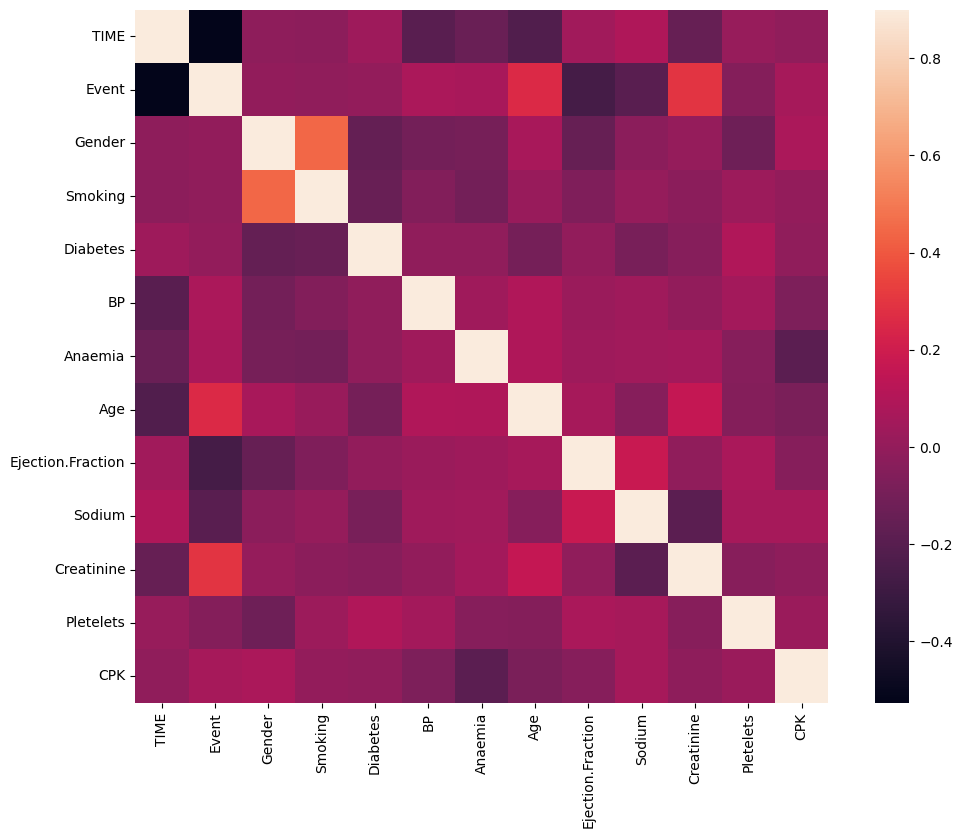

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

# This will give heatmap of the correlation between different features.
# It will be helpful to identify features that strongly correlate with 'Event'.


Splitting the data

In [12]:
from sklearn.model_selection import train_test_split

# Define the features and the target
X = df.drop('Event', axis=1)
y = df['Event']


In [13]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


 Define Model

In [14]:
# Define the keras model
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(8, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer


compile model

In [15]:
# Compile the keras model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])


Train model

In [16]:
# Fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=10, verbose=1)


Epoch 1/150
24/24 [==============================] - 1s 3ms/step - loss: 0.6409 - accuracy: 0.6820
Epoch 2/150
24/24 [==============================] - 0s 3ms/step - loss: 0.6117 - accuracy: 0.6946
Epoch 3/150
24/24 [==============================] - 0s 3ms/step - loss: 0.5895 - accuracy: 0.6987
Epoch 4/150
24/24 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.7071
Epoch 5/150
24/24 [==============================] - 0s 3ms/step - loss: 0.5514 - accuracy: 0.7197
Epoch 6/150
24/24 [==============================] - 0s 3ms/step - loss: 0.5358 - accuracy: 0.7322
Epoch 7/150
24/24 [==============================] - 0s 3ms/step - loss: 0.5216 - accuracy: 0.7364
Epoch 8/150
24/24 [==============================] - 0s 3ms/step - loss: 0.5082 - accuracy: 0.7490
Epoch 9/150
24/24 [==============================] - 0s 3ms/step - loss: 0.4955 - accuracy: 0.7615
Epoch 10/150
24/24 [==============================] - 0s 3ms/step - loss: 0.4833 - accuracy: 0.7573
Epoch 11/

Evaluate model

In [17]:
# Evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: %.2f' % (accuracy*100))


2/2 [==============================] - 0s 10ms/step - loss: 0.8415 - accuracy: 0.8000
Accuracy: 80.00
